
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

## Trabajo práctico entregable - Parte 2

### Integrantes
- Bosch, Daniela
- Gherra, Estefanía
- Iberra, Yanina
- Mantovani, Luciano
- Palacio Pastor, Natalí

## **Resumen**

El presente trabajo contiene la resolución de tres ejercicios.

En el primero se realiza una estimación puntual y una por intervalos para la diferencia de medias de los salarios entre hombres y demás géneros (mujeres u otros).

En el segundo se realiza un test de hipótesis para la diferencia de medias en cuestión. La Hipótesis Alternativa (en caso de rechazar la Ho con la evidencia muestral) llevará a concluir, con un nivel de significación del 5%, que los hombres ganan en promedio más que el resto de los géneros, entre las personas que trabajan en TI.

En el tercer ejercicio se opta por la opción 1, que consiste en elaborar un artículo de difusión a presentar como parte de una organización sin fines de lucro. El resultado que se toma como relevante para elaborarlo, se relaciona con la deserción de estudios universitarios observada entre quienes trabajan en TI y respondieron la encuesta. Se realiza un test de hipótesis para la diferencia de salarios netos promedio entre los grupos analizados, para sustentar lo expuesto en la comunicación.

## Ejercicio 1: Estimación

Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros (diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

### Librerías  y configuraciones generales

In [1]:
import io
import matplotlib                   
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import statsmodels.stats.api as sms

plt.style.use('ggplot')
%matplotlib inline
seaborn.set_context('talk')
seaborn.set_palette('pastel') 

seaborn.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Lectura del dataset y definiciones previas

**Código para poder abrir el archivo con el dataset "depurado en el entregable 1", desde el drive compartido. Seguir los pasos que indica:**


In [2]:
# Al ejecutar el código, se mostrará un link, al cual se debe acceder 
# con la cuenta de correo (personal) autorizada en el drive compartido

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    return GoogleDrive(gauth)

def read_csv_from_drive(drive, id, filename):
    downloaded = drive.CreateFile({'id':id}) 
    downloaded.GetContentFile(filename)  
    return pd.read_csv(filename)

drive = connect_to_drive()
df = read_csv_from_drive(drive, '10-5Uh0QCwrXY6HqbOGVsFQzIIAM7xCPd' , 'dataset_without_outliers.csv')

**Exploración y definiciones previas:**

In [3]:
# Se observan las primeras tres filas, y todas las columnas del df.
print(df.shape)
df[:3]

(5460, 49)


,Unnamed: 0,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


Ya que analizaremos la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros, observemos algunos estadísticos de éstos grupos.




In [4]:
# Descriptivas agrupadas por género.
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                    
                             count          mean  ...       75%       max
profile_gender                                    ...                    
Hombre                      4593.0  87353.546057  ...  106000.0  290000.0
Mujer                        841.0  75160.672521  ...   93000.0  281250.0
Otros                         26.0  87173.076923  ...  111500.0  260000.0

[3 rows x 8 columns]

In [5]:
# Definición del nivel de signifación a utilizar.
alpha = 0.05

In [6]:
# Definición de sub-muestras: Hombres (grupo A) y No hombres (grupo B, 
# incluye casos con las categorías mujeres, u otros, de la variable género)
# Se elimina el filtrado de salarios mayores a $1000 ya que el df filtrado tiene salarios por encima de $17k
is_man = df.profile_gender == 'Hombre'

groupA = df[is_man].salary_monthly_NETO
groupB = df[~is_man].salary_monthly_NETO

### **Respuesta Ejercicio 1:**

### **1.1  Estimación puntual**

Variable: Salario neto.

Parámetro a estimar (diferencia de medias poblacionales) =  $ μA - μB  $

Estimador (diferencia de medias muestrales) =  $ \bar{x}_A - \bar{x}_B $

In [7]:
diferencia_de_medias = groupA.mean() - groupB.mean()
print("Diferencia de medias: {:.2f}".format(diferencia_de_medias))

Diferencia de medias: 11832.64


Con los datos de la muestra, se obtiene una **estimación puntual de $11.832,64**  para la diferencia entre la media de los salarios de los hombres y la del resto de los géneros. 

La diferencia estimada es positiva, lo cual indica que los hombres (group A) de esta muestra ganarían en promedio más que el resto de los géneros.

Ahora bien, ¿qué incertidumbre se tiene respecto a esta estimación? Es decir, ¿cuánto cabe esperar que el valor de $ \bar{x}_A - \bar{x}_B $ se desvíe de $ μA - μB  $ ? Esta pregunta puede contestarse calculando intervalos de confianza (aproximación frecuentista).

### **1.2 Estimación por Intervalos**

Asumimos varianzas poblacionales diferentes para cada grupo.

In [8]:
# Cálculo del intervalo de confianza (del 95%) para la diferencia de medias entre los grupos A y B.
cm = sms.CompareMeans(sms.DescrStatsW(groupA), sms.DescrStatsW(groupB))
interv_confianza=cm.zconfint_diff(alpha=alpha, usevar='unequal')
print("Intervalo de confianza: ({:.2f}, {:.2f}) \n".format(interv_confianza[0], interv_confianza[1]))

Intervalo de confianza: (8990.43, 14674.85) 



**Interpretación:** Con la evidencia que aportan los datos de la muestra, y un **95% de confianza**, podemos decir que el parámetro poblacional diferencia de medias de los salarios entre el grupo A y B, estará contenida en el intervalo: **LIC= 8990.43 pesos** y **LSC= 14674.85 pesos**.

Se observa que la diferencia estimada por intervalos también es positiva, por lo que los hombres tendrían en promedio, un salario mayor que el resto de los géneros. Estos resultados están en línea con lo que muestran varios estudios en la materia, como por ejemplo "The State of the Gender Pay Gap in 2021", donde se afirma que: "Sigue existiendo una disparidad en la forma en que se paga a hombres y mujeres, incluso cuando se controlan todos los factores compensables, lo que significa que a las mujeres se les sigue pagando menos que a los hombres debido a razones no atribuibles más que el género."  [Fuente: https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job]

Si bien aquí no profundizaremos en un análisis que controle variables que pudieran estar influyendo en esa diferencia, sí buscaremos mayor rigurosidad en la afirmación "los hombres ganan más que los otros géneros (particularmente mujeres, y otros). Por lo tanto, en el Ejercicio 2. realizaremos un test de hipótesis de cola derecha para la diferencia de medias de salarios entre estos grupos.

**Notar**: Utilizamos el estadístico z (ver fórmula en Ejercicio 2.1) para realizar la estimación por intervalos, gracias al Teorema Central del Límite, y a la consistencia del estimador de la varianza (y desviación estándar) cuando el tamaño de cada submuestra o grupo es mayor a 100.

**Es decir, utilizamos dicho estimador porque el caso se enmarca en la siguiente situación**:

**1) Distribuciones No Normales** (de los Salarios Netos en las sub-muestras).

Mediante un método gráfico (QQ-PLot) observamos que los cuantiles de las distribuciones del salario neto, en ambos grupos, se alejan de la curva de 45 grados, que representaría la normalidad. Por esta razón no se puede utilizar el test t.

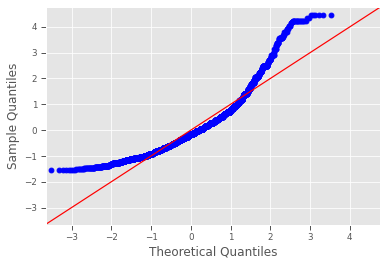

QQ-Plot Salario Neto Grupo A vs Normal


In [9]:
import statistics as s
import pylab
import statsmodels.api as sma

ZA= (groupA - groupA.mean()) / s.stdev(groupA)
#print(ZA)
#test = numpy.random.normal(0,1, 1000), así sería si fuera normal.
sma.qqplot(ZA, line='45')
pylab.show()

print("QQ-Plot Salario Neto Grupo A vs Normal")

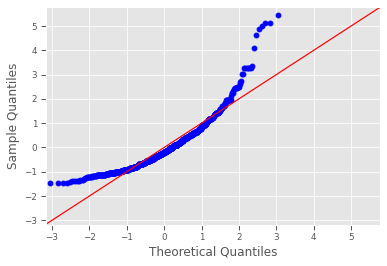

QQ-Plot Salario Neto Grupo B vs Normal


In [10]:
ZB= (groupB - groupB.mean()) / s.stdev(groupB)
#print(ZB)
#test = numpy.random.normal(0,1, 1000) así sería si fuera normal.
sma.qqplot(ZB, line='45')
pylab.show()

print("QQ-Plot Salario Neto Grupo B vs Normal")

**2) Varianzas poblacionales desconocidas**

Hacemos test de igualdad de varianzas, para saber si seleccionamos el parámetro "igual o distinto", dentro del $z$-test.

In [11]:
from scipy.stats import levene
stat, p = levene(groupA, groupB) #alpha=0,05 por default.
p

8.681907460291673e-06

La prueba de *Levene* tiene como $H_0$ la igualdad de varianzas poblacionales, y como $H_A$ que las varianzas poblacionales son distintas.

Teniendo en cuenta el valor p obtenido (=8,68e-06) < alpha(=0,05), se puede concluir que hay evidencia en la muestra para rechazar la igualdad de varianzas con un 95% de confianza.


**3) Tamaños de sub-muestras > 100**

In [12]:
# Tamaños de sub-muestras > 100
nA = len(groupA)
nB = len(groupB)
print("nA=",nA,"; nb=",nB)

nA= 4593 ; nb= 867


**4) Grupos o sub-muestras de casos independientes.** 

No se trata de muestras pareadas o dependientes, en donde por ejemplo el mismo caso se observaría antes y después de un tratamiento. Se trabaja con casos independientes entre sí: personas cuyo género declarado es hombre, mujer u otro, sin tener dependencia entre ellas.

### **1.3 Relaciones**

Por un lado, la *estimación por intervalos*, es decir, la obtención del Límite Inferior de Confianza (8.990,42 pesos), y del Límite Superior de Confianza (14.674,85 pesos) para el parámetro deseado, surgen de restarle y sumarle (respectivamente) al valor estimado con la muestra (*estimación puntual* $ 11.832,64), un componente que considera en su cálculo la variabilidad en la muestra, el tamaño de los subgrupos A y B de la muestra, y el error tipo I asumido en la estimación (alpha=0,05).

Además, existe una estrecha relación entre la *estimación por intervalos* y el *test de hipótesis*, ya que en ambos métodos el procedimiento es bastante similar, (aunque con sus consideraciones e interpretaciones apropiadas para cada caso en particular). 

**En términos generales en ambos métodos (Estimación por Intervalos y Test de Hipótesis) necesitamos:**

1) Establecer el parámetro (a estimar o a testear).

2) Seleccionar un estadístico (pivote) con distribución de probabilidad conocida.

3) Definir el nivel de confianza (alpha=0.05) con el cual se va a trabajar (notar: aquí puede aparecer una diferencia vinculada con el punto 4 siguiente, ya que en la estimación por intervalos se trabaja con "dos colas" y por lo tanto el alpha se divide en dos, para obtener el LIC y el LSC; mientras que en el caso del test de hipótesis se puede trabajar de forma unilateral (concentrando el alpha en la cola izquierda, o cola derecha según el sentido de la hipóetisis alternativa), o de forma bilateral (si se prueba sólo igualdad versus desigualdad).

4) Se establecen LIC y LSC (en estimación por intervalos) o Zona de Rechazo de Ho y Zona de No Rechazo de Ho (en test de hipótesis -también se pude utilizar el criterio del valor-p).

5) Se concluye interpretando el intervalo de confianza estimado, con el nivel de confianza escogido; o sobre el rechazo o no rechazo de la Ho con la evidencia proporcionada por la muestra, de acuerdo al nivel de significación alpha establecido (probabilidad del Error tipo I, suponiendo $H_0$ verdadera).

------

**En nuestro caso de estudio**, el intervalo de confianza que estimamos arriba utiliza en su cálculo alpha/2 en cada cola por lo que ya se explicó.

La estimación puntual como la estimación por intervalos arrojó una diferencia positiva entre la media del salario de los hombres menos la media del salario del resto (mujeres u otros). Esto va en línea con la tendencia de la teoría o estudios de brecha de género en la actualidad. 

En consecuencia, resulta interesante testear si hay evidencia en la muestra que permita decir que efectivamente el salario de los hombres es mayor que el del resto de los géneros, entre los y las trabajadoras del sector TI que residen en Argentina. Esto último estará representado en nuestra hipótesis alternativa en el test que haremos debajo.

# Ejercicio 2: Test de hipótesis


### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

### Respuesta 2.1

**Aclaración del equipo**: por lo mencionado en párrafos previos, realizaremos test de cola derecha, y no de dos colas que testearía solamente la desigualdad de salarios (es decir, no veremos sólo si son diferentes las medias entre los grupos, sino que testearemos al mismo tiempo el sentido de la desigualdad).

**Hipótesis Nula**

$H_0= μ_A - μ_B <= 0$

**Hipótesis Alternativa**

$H_A= μ_A - μ_B > 0$


**Estadístico (Pivote)**
  * Identificar el estadístico: 
$$ z = \frac{ ( \bar{x}_A - \bar{x}_B - (μ_A - μ_B) } { ( \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B})^ \frac{1}{2} }   $$ 


  * Escribir qué distribución tiene bajo $H_0$
  
 $$ z = N(0,1) $$


**Se opta por el $z$-test porque el caso de estudio queda enmarcado en la situación ya explicada en 1.2:**

1) Distribuciones No Normales;

2) Varianzas desconocidas (y distintas);

3) Tamaño de subgrupos >100.

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### Respuesta 2.2

**2.2.1. Cálculo del p-valor y decisión sobre el rechazo o no de la hipótesis nula.**

In [13]:
# z test de comparación de medias de dos grupos.

# cm = sms.CompareMeans(sms.DescrStatsW(groupA), sms.DescrStatsW(groupB))  #ya ejecutado arriba
print('ztest (z, p-value)',cm.ztest_ind(alternative='larger',usevar='unequal' )) # hipotesis alternativa: sueldo_hombres > sueldo_resto


ztest (z, p-value) (8.159687346857362, 1.6794645375538725e-16)


Decisión: Como el P-valor (=1,679e-16) < alpha (=0,05); **hay evidencia muestral suficiente para rechazar la $ H_0$**.

**2.2.2. Interpretación del resultado.** 

**Con un nivel de significación o error tipo I del 5%**, hay evidencia suficiente en la muestra para rechazar la hipótesis nula que decía que la diferencia entre la media de los salarios netos de los hombres y la media de los salarios netos del resto de los géneros, era menor o igual a 0 (cero). Por lo tanto, con ese mismo nivel alpha, nos quedamos con la hipótesis alternativa que dice que la diferencia es positiva, o que **el salario promedio de los hombres es mayor al salario promedio del resto de los géneros.**

**2.2.3. Respuesta a: Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al test?**

Si bien son distintos, ambos tamaños de muestra son mayores a 100. Por lo tanto, a pesar de que las distribuciones de salarios no sean normales (lo cual es requerido para usar un test- $t$), y a pesar de que desconocemos las varianzas poblacionales (sólo podemos probar si son iguales o distintas); podemos utilizar el estadístico $z$ basándonos en el Teorema Central del Límite, y en la propiedad de consistencia de la varianza ($s^2$) cuando n es grande. Es decir, no afecta al test-$z$ que los tamaños de los grupos sean distintos.

Ahora bien, sí debe tenerse en cuenta el tamaño de los grupos, además de la diferencia de las varianzas, cuando se trabaja con el test-$t$: *scipy.stats.ttest_ind*.
En particular, cuando las varianzas poblacionales son distintas, en dicho test debe seleccionarse el parámetro: *equal_var = False  ("perform Welch’s t-test, which does not assume equal population variance*"  [Fuente: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html]).

**Notar**: "**Student's t-test** assumes that the sample means (test statistics) of two population distributions being compared are normally distributed with equal variance. **Welch's t-test** is designed for unequal sample distribution variance, but the assumption of **normally distributed sample** is maintained." [Fuente: https://en.wikipedia.org/wiki/Welch%27s_t-test]. 

Entonces, como nuestros datos no se distribuyen de forma normal, no podemos usar estos test-$t$, ni el Test de Welch. Pero sí podemos recurrir al test-$z$, porque $n_A > 100$, y $n_B > 100$ (explicado ut-supra).



# Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


### **Respuesta Ejercico 3** - Código para gráficos de la publicación.

Oración o resultado del entregable sobre la que se hace énfasis:

**El 28% de los trabajadores del sector informático que declararon tener estudios universitarios, los tienen incompletos (es decir, sus estudios universitarios quedaron incompletos porque desertaron la carrera).**

Se elige dentro de las tres opciones, el punto 1: redactar un informe con el fin de impulsar un plan de acción conjunto entre distintos actores (universidades, empresas del sector informático, gobiernos, fundaciones) para fomentar la finalización de los estudios de los empleados TI. Ya que en la encuesta de sueldos de la comunidad tecnológica de Argentina, se observa que el incentivo no vendría exclusivamente por el lado del salario (el salario neto medio de quienes han finalizado sus estudios universitarios no presenta una diferencia significativa respecto al de quienes no los completaron).


In [14]:
df.profile_studies_level.value_counts()

Universitario    3703
Terciario        1034
Secundario        402
Posgrado          293
Doctorado          24
Primario            2
Posdoctorado        2
Name: profile_studies_level, dtype: int64

In [15]:
# Se reagrupan las clases minoritarias
new_groups = {
    'Posdoctorado': 'Posgrado',
    'Doctorado': 'Posgrado',
    'Primario': 'Pre-grado',
    'Secundario': 'Pre-grado'
}
order = ['Pre-grado', 'Terciario', 'Universitario', 'Posgrado']
hue_order = ['Incompleto', 'En curso', 'Completado']
grouped_studies_level = df.profile_studies_level.replace(new_groups)
df['grouped_studies_level'] = grouped_studies_level

In [16]:
df['grouped_studies_level'].value_counts()

Universitario    3703
Terciario        1034
Pre-grado         404
Posgrado          319
Name: grouped_studies_level, dtype: int64

In [17]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
font_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Serif',
 'Humor Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Mono']

Text(0.28, -0.3, 'Gráfico 1.1. Niveles de estudio de trabajadores informáticos \n')

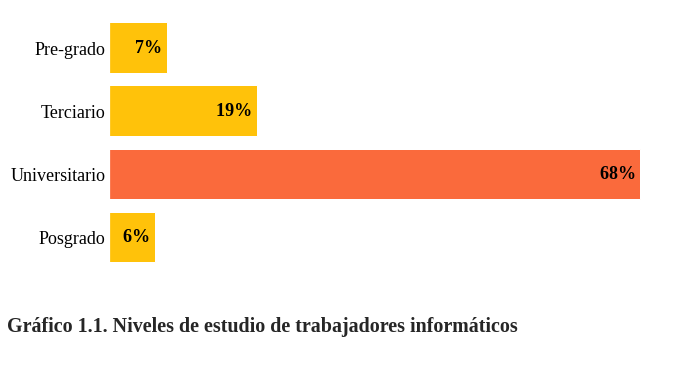

In [18]:
plot_text_color = 'black' #"#0C7BDC"
bar_color = ["#FFC20A","#fa6a3c","#FFC20A","#FFC20A"]
seaborn.set(font="Liberation Serif")

ax = df['grouped_studies_level'].value_counts().reindex(order[::-1]).plot(kind='barh', figsize=(10,5),
                                                  color=bar_color, fontsize=10, width=0.8);
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

total=len(df['grouped_studies_level'])

for p in ax.patches:
    percentage ='{:.0f}% '.format(p.get_width()/total*100)
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(percentage, xy=(p.get_width(), bottom+height/2), 
                ha='right', va='center', color=plot_text_color, fontsize=18, weight='bold')

ax.xaxis.set_visible(False)

ax.tick_params(axis="y", direction="in")
plt.yticks(fontsize =18, color= plot_text_color)


plt.title('Gráfico 1.1. Niveles de estudio de trabajadores informáticos \n',
         fontsize =20, y=-0.3, x=0.28,weight='bold')

In [19]:
universitarios = df.grouped_studies_level.isin(['Universitario'])
print("Tamaño del dataset antes de quedarnos sólo con Universitarios: %i \n" % len(df))
df_universitarios = df[universitarios]
print("Tamaño del dataset después de quedarnos sólo con los Universitarios: %i \n" % len(df_universitarios))

Tamaño del dataset antes de quedarnos sólo con Universitarios: 5460 

Tamaño del dataset después de quedarnos sólo con los Universitarios: 3703 



In [20]:
df_universitarios['profile_studies_level_state'].value_counts()

Completado    1452
En curso      1225
Incompleto    1026
Name: profile_studies_level_state, dtype: int64

Text(0.28, -0.3, 'Gráfico1.2. Estado de avance en estudios universitarios del sector TI \n')

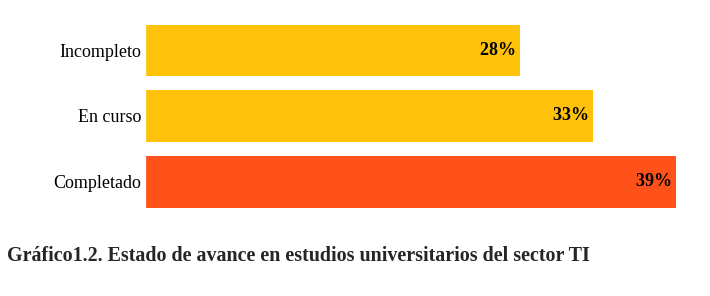

In [21]:
plot_text_color = 'black' #"#0C7BDC"
bar_color = ["#FF521B","#FFC20A","#FFC20A"]
#bar_color = "#FFC20A"

ax = df_universitarios['profile_studies_level_state'].value_counts().plot(kind='barh', figsize=(10,4), color=bar_color, fontsize=10, width=0.8);
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

total=len(df_universitarios['profile_studies_level_state'])

for p in ax.patches:
    percentage ='{:.0f}% '.format(p.get_width()/total*100)
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(percentage, xy=(p.get_width(), bottom+height/2), 
                ha='right', va='center', color=plot_text_color, fontsize=18, weight='bold')

ax.xaxis.set_visible(False)

ax.legend([],[], frameon=False)

ax.tick_params(axis="y", direction="in")
plt.yticks(fontsize =18, color= plot_text_color)
ax.yaxis.set_label_text('')

plt.title('Gráfico1.2. Estado de avance en estudios universitarios del sector TI \n',
         fontsize =20,y=-0.3, x=0.28,weight='bold')

In [22]:
# Media de salarios universitarios
df_univ_mean = df_universitarios[['profile_studies_level_state', 'salary_monthly_NETO']].groupby('profile_studies_level_state').mean()
df_univ_mean
# Es mayor la media de salario en Universitarios Completo

,salary_monthly_NETO
profile_studies_level_state,
Completado,97019.842824
En curso,70119.493518
Incompleto,93143.323782


In [23]:
df_univ_mean.sort_values('salary_monthly_NETO', ascending=False, inplace=True)

In [24]:
# Mediana de salarios universitarios
df_univ_median = df_universitarios[['profile_studies_level_state', 'salary_monthly_NETO']].groupby('profile_studies_level_state').median()
df_univ_median
# Es mayor la media de salario en Universitarios Completado

,salary_monthly_NETO
profile_studies_level_state,
Completado,89000.0
En curso,63000.0
Incompleto,85050.0


Text(0.35, -0.3, 'Gráfico 1.3. Salario neto promedio, de trabajadores del sector TI universitarios (en K=miles de $Ar)\n')

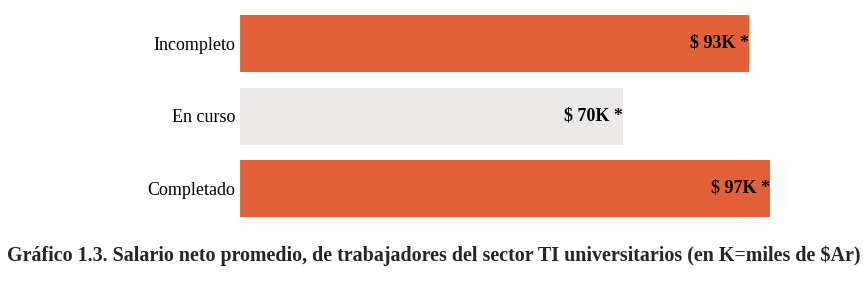

In [25]:
plot_text_color = 'black'
font_type = "Arial"
plt.figure(figsize=(10, 4))
ax = seaborn.barplot(
    data=df_univ_mean, 
    x='salary_monthly_NETO',
    y=df_univ_mean.index, 
    order=["Incompleto", "En curso", "Completado"],
    palette=["#FF521B","#edeae8","#FF521B"]
)

ax.set_facecolor("white")

for p in ax.patches:
    percentage ='$ {:.0f}K *'.format(p.get_width()/1000)
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(percentage, xy=(p.get_width(), bottom+height/2), 
                ha='right', va='center', color=plot_text_color, fontsize=18, weight='bold')

ax.xaxis.set_visible(False)

ax.legend([],[], frameon=False)

ax.tick_params(axis="y", direction="in")
plt.yticks(fontsize =18, color= plot_text_color)
ax.yaxis.set_label_text('')

plt.title('Gráfico 1.3. Salario neto promedio, de trabajadores del sector TI universitarios (en K=miles de $Ar)\n',
         fontsize =20,y=-0.3, x=0.35,weight='bold')

## Anexo: Test de comparación de medias para las conclusiones de la publicación.

### Z Test - Comparación de 2 medias. 

(Diferencia de medias entre dos grupos)

Comparamos promedio de salario neto de empleados con estudios universitarios incompletos vs. promedio de salario neto de empleados con estudios universitarios completados.

In [26]:
# Hacemos test de diferencia de medias entre grupo univ_incompleto y univ_completado: 

grupo_univ_incompleto = df_universitarios[(df_universitarios.profile_studies_level_state == 'Incompleto')].salary_monthly_NETO
#print(grupo_univ_incompleto)

grupo_univ_completado = df_universitarios[(df_universitarios.profile_studies_level_state == 'Completado')].salary_monthly_NETO
#print(grupo_univ_completado)

cm_uni = sms.CompareMeans(sms.DescrStatsW(grupo_univ_incompleto), sms.DescrStatsW(grupo_univ_completado)) 

print('ztest (z, p-value)',cm_uni.ztest_ind()) # por default hace hipotesis alt. de desigualdad: sueldo_Univ_Incompleto != sueldo_Univ_Completado
                                                                # especificamos además que las varianzas son distintas.


ztest (z, p-value) (-2.046688748351352, 0.04068865470546725)


Si se considera un nivel de significación o error tipo I del 1% (alpha=0,01):

Como el p-valor=0,04 > alpha=0,01  --> Se concluye con un nivel de significación del 1%, que no hay evidencia significativa en la muestra para rechazar la $H_0$ de igualdad de medias entre los grupos.

Notar: Si se admitiera un error tipo I del 5% se rechazaría la $H_0$; dada esta situación límite, se prefiere exigirle una mayor confianza o menor error tipo I a la prueba (menor probabilidad de rechazar la $H_0$ cuando es verdadera).

**Notar: Para la comparación de dos medias se utiliza el estadístico z (y no el t) ya que se encuadara en la situación:**

**1) Distribuciones No Normales**

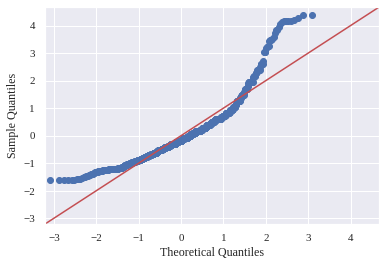

QQ-Plot Salario Neto Grupo Univ. Incompleto vs Normal


In [27]:
import statistics as s
import pylab
import statsmodels.api as sma

Zui= (grupo_univ_incompleto - grupo_univ_incompleto.mean()) / s.stdev(grupo_univ_incompleto)
#print(Zui)
#test = numpy.random.normal(0,1, 1000), así sería si fuera normal.
sma.qqplot(Zui, line='45')
pylab.show()

print("QQ-Plot Salario Neto Grupo Univ. Incompleto vs Normal")

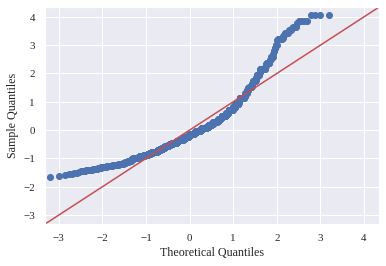

QQ-Plot Salario Neto Grupo Univ. Completado vs Normal


In [28]:
Zuc= (grupo_univ_completado - grupo_univ_completado.mean()) / s.stdev(grupo_univ_completado)
#print(Zuc)
#test = numpy.random.normal(0,1, 1000) así sería si fuera normal.
sma.qqplot(Zuc, line='45')
pylab.show()

print("QQ-Plot Salario Neto Grupo Univ. Completado vs Normal")

Mediante el método gráfico (QQ-PLot) observamos que los cuantiles de las distribuciones del salario neto, en ambos grupos, se alejan de la curva de 45 grados, que representaría la normalidad. Por esta razón no se puede utilizar el test t.

**2) Varianzas Desconocidas**

Hacemos test de igualdad de varianzas, para saber si seleccionamos el parámetro "igual o distinto", dentro del  $z$-test.

In [29]:
from scipy.stats import levene
stat, p = levene(grupo_univ_incompleto, grupo_univ_completado) #alpha=0,05 por default.
p

0.11966145357039579

La prueba de Levene tiene como  $H_0$  la igualdad de varianzas poblacionales, y como  $H_A$  que las varianzas poblacionales son distintas.

Teniendo en cuenta el valor p obtenido (=0,119) > alpha(=0,05), se puede concluir que NO hay evidencia en la muestra para rechazar la igualdad de varianzas con un nivel de significación del 5% (No se rechaza la $H_0$ de igualdad de varianzas).


**3) Tamaños de sub-muestras superiores a 100**

In [30]:
print('n Uni.Incom.=' , len(grupo_univ_incompleto))

print('n Uni.Compl.=' , len(grupo_univ_completado))

n Uni.Incom.= 1026
n Uni.Compl.= 1452


### ANOVA - Comparación de 3 medias o más.

Si bien este análisis excede los contenidos que vimos en el curso, nos cuestionamos si deberíamos utilizar el test ANOVA para la comparación múltiple de medias, ya que en nuestra muestra tenemos tres grupos (Incompleto, En curso, y Completado) entre los cuales se dividen las personas con estudios universitarios TI.

En este sentido, planteamos el test ANOVA para observar a qué resultados arribamos, y sobretodo, para colocarlo en la mesa de discusión, y poder aprender al respecto.

Luego del test ANOVA, hacemos el Test de Tuyek, que compara las medias de a pares. Y por último, verificamos los requerimientos de la prueba (donde se da lugar a la discusión).

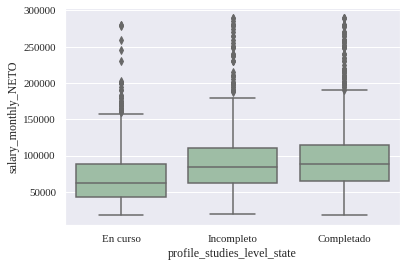

Boxplot del salario neto, según estado de estudios universitarios TI.


,sum_sq,df,F,PR(>F)
C(profile_studies_level_state),5.335560e+11,2.0,142.207693,3.152564e-60
Residual,6.941105e+12,3700.0,NaN,NaN


In [31]:
# Test ANOVA
import seaborn as  sns
ax = sns.boxplot(x='profile_studies_level_state', y='salary_monthly_NETO', data=df_universitarios, color='#99c2a2')
#ax = sns.swarmplot(x="profile_studies_level_state", y="salary_monthly_NETO", data=df_universitarios, color='#7d0013')
plt.show()
print("Boxplot del salario neto, según estado de estudios universitarios TI.")

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('salary_monthly_NETO ~ C(profile_studies_level_state)', data=df_universitarios).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

**Del resultado del test de ANOVA, se concluye con un nivel de significación del 5% (y también lo sería para el 1%), que hay diferencias entre los salarios netos promedios de los tres grupos.**

[O sea, como el p-value(=3,15e-60) < alpha(=5%) -pero también vale para el 1%-, se rechaza la $H_0$ de igualdad de medias]

Para ver entre qué grupos se da la existencia (o no) de diferencias de salarios promedios, se hace la comparación de a pares mediante el test de Tukey:

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp_05 = pairwise_tukeyhsd(endog=df_universitarios['salary_monthly_NETO'], groups=df_universitarios['profile_studies_level_state'], alpha=0.05)
print(m_comp_05)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp_01 = pairwise_tukeyhsd(endog=df_universitarios['salary_monthly_NETO'], groups=df_universitarios['profile_studies_level_state'], alpha=0.01)
print(m_comp_01)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1     group2     meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------------
Completado   En curso -26900.3493  0.001 -30840.079 -22960.6196   True
Completado Incompleto   -3876.519 0.0723 -8018.3013    265.2632  False
  En curso Incompleto  23023.8303  0.001 18726.0954  27321.5651   True
----------------------------------------------------------------------
          Multiple Comparison of Means - Tukey HSD, FWER=0.01          
  group1     group2     meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------
Completado   En curso -26900.3493  0.001 -31799.0515 -22001.6471   True
Completado Incompleto   -3876.519 0.0723  -9026.4555   1273.4174  False
  En curso Incompleto  23023.8303  0.001  17679.9806  28367.6799   True
-----------------------------------------------------------------------

**Como se observa en las salidas, para un nivel de significación del 5% (y también para el 1%), NO HAY EVIDENCIA PARA RECHAZAR la igualdad de salarios netos promedio entre los empleados universitarios con estudios incompletos y con estudios completados.**  p=0,07 > alpha=0,05

Las diferencias entre las medias de los salarios se observan para el grupo de universitarios incompletos respecto a  los universitarios en curso, o también para los universitarios completos respecto a los universitarios en curso.

**Verificación de los supuestos del test ANOVA:**

El test de comparación múltiple de medias ANOVA requiere el cumplimiento de ciertos supuestos.

* Las muestras son independientes.

* Las poblaciones comparadas tienen todas igual varianza (homoscedasticidad).

* Las poblaciones comparadas (distribuciones de probabilidad de la variable dependiente correspondiente a cada factor, o los errores obtenidos del modelos) son normales.


Con respecto al primer punto, las observaciones (trabajadores TI) de las muestras, son independientes entre sí.

Respecto a la normalidad, graficamos debajo el histograma de los residuos estandarizamos que surgen del test, su QQ-Plot, y también realizamos el test de normalidad S.W. para contar con mayor rigurosidad.

Por último se realiza el test de igualdad de varianzas entre los grupos.

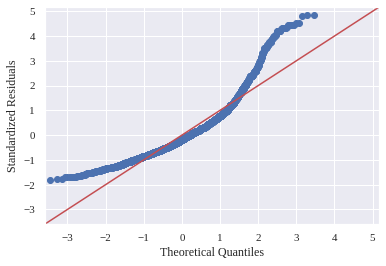

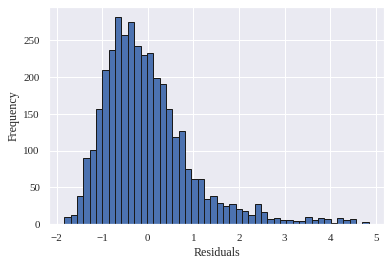

Test Shapiro-W de (Ho) Normalidad:  SW= 0.8922759890556335 ; p= 4.203895392974451e-45
Test Barlett de (Ho) Igualdad de Varianzas:  B= 99.51423280778963 ; p= 2.459002160822944e-22


In [33]:
residuos = model.resid_pearson
#seaborn.histplot(residuos)

# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(residuos, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(residuos, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print('Test Shapiro-W de (Ho) Normalidad: ', "SW=", w, "; p=", pvalue)

import scipy.stats as stats
grupo_univ_incompleto = df_universitarios[(df_universitarios.profile_studies_level_state == 'Incompleto')].salary_monthly_NETO
grupo_univ_completado = df_universitarios[(df_universitarios.profile_studies_level_state == 'Completado')].salary_monthly_NETO
grupo_univ_encurso = df_universitarios[(df_universitarios.profile_studies_level_state == 'En curso')].salary_monthly_NETO


w, pvalue = stats.bartlett(grupo_univ_incompleto, grupo_univ_completado, grupo_univ_encurso)
print('Test Barlett de (Ho) Igualdad de Varianzas: ',"B=", w,"; p=", pvalue)

Se observa en los gráficos y en el resultado de la prueba S.W. (p< alpha=0,05) que NO se cumple la normalidad requerida (tampoco se cumple al 1% de nivel de significación). 

En el teste de Barlett vemos que NO se cumple la igualdad de varianzas (se rechaza la $H_o$ al 5% y también al 1% de nivel de significación).

Estos resultados ponen en discusión los resultados de la prueba ANAVA. Sin embargo, quizá estos problemas de requerimientos puedan solucionarse (y por lo tanto arribar entonces a las mismas conclusiones) mediante la realización de una transformación en la escala de la variable; o adoptando purebas de hipótesis más robustas ante el incumplimiento de supuestos, como en esta situación (lo dejamos como cuestionamiento para su profundización).

--------------------

# FIN
